## Pandas Analytics Training

#### Goal: This is to provide you with a very high level understanding of how to work with Pandas. This tutorial should provide you with the basics to slice, dice, summarize, and model a dataset.  <br/> <br/> Intended Audience: Business Analysts, New Business Analytics Specialists, Engineers, and Specialized Analysts

* **Reading in various files** comma, tilde, space seperated
* **Basic Operations** Head, Tail, Data Types, Info, describe, Renaming columns
* **Subsetting Data**: Where clause, selecting specific columns
* **Grouping Data** pivot tables
* **Quick Plotting Exercise** Histogram, boxplot, and barchart
* **Preparing Data for a sklearn model** utilizing df.types and converting test/train for model
* **KNN sklearn model** Quickly look at how we can start of with a pandas df and build a model



In [2]:
import pandas as pd
from sklearn import neighbors
import matplotlib as plot

#### Reading in a basic csv file: Notice Pandas is smart enough to notice we are using a "," as the delimiter

In [3]:
iris = pd.read_csv('F:/RWorkingDirectory/iris.csv')

#### We can also specify the delimiter used

In [4]:
iris = pd.read_csv('F:/RWorkingDirectory/iris.csv',sep=",")

#### Also, we often times work with space delimited files

In [5]:
# specify the column widths
colspecs = [(0, 10),(10,19),(19,28)]
# usually width delimited files do not include header so I specified this to none
df = pd.read_fwf('F:/RWorkingDirectory/SpaceDelimitedFile.txt', colspecs=colspecs, header=None)
# add in our columns
df.columns = [
'MeterID',
'Usage',
'DateRead']

In [6]:
df

,MeterID,Usage,DateRead
0,NXZ10103,1141,26-Mar-15
1,NXZ10104,3254,26-Mar-15
2,NXZ10105,2557,26-Mar-15
3,NXZ10106,1065,26-Mar-15
4,NXZ10107,1214,26-Mar-15
5,NXZ10108,486,26-Mar-15
6,NXZ10109,1136,26-Mar-15
7,NXZ10110,3124,26-Mar-15
8,NXZ10111,2832,26-Mar-15


# Basic Operations

#### Here we will look at the head (top n rows) and tail (bottom n rows) of the data frame

In [7]:
# Note: we can change this number out to look at any number of rows
iris.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.tail(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### It is very important to know the data types contained in the frame. Here we can see its numeric and character (object) but when we have 100's of columns this can become more difficult.

In [9]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

#### Now that we know what type of data we are working with lets obtain some more value from our dataframe using the info and describe commands.

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### Above we see there are a 150 values in every column, this command is more useful when we have Na values in our data set

In [401]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### The describe function is very powerful because it gives a quick look of summary statistics. This is very handy because we can quickly look at the standard deviation and mean. Now when I see a standard deviation greater than the mean I know there are outliers in the dataset.  <br/> <br/> Just to quickly show how this works lets update the first value of Sepal.Length to an extremly high number.

In [402]:
iris['Sepal.Length'][1] = 999

In [403]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,12.470667,3.057333,3.758000,1.199333
std,81.094576,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,999.000000,4.400000,6.900000,2.500000


#### Now we can quickly see there is at least one confirmed outlier in our data

In [404]:
iris['Sepal.Length'][1] = 5.1

#### Renaming Columns: This is very important so you and others can interpert the data.

In [405]:
iris.rename(columns={'Sepal.Length':'FirstColumn'}, inplace=True)

In [406]:
iris.head(1)

,FirstColumn,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [407]:
iris.columns = ['Slength', 'Swidth','Plength','Pwidth','FlowerType']

In [408]:
iris.head(1)

,Slength,Swidth,Plength,Pwidth,FlowerType
0,5.1,3.5,1.4,0.2,setosa


#### Now, instead of changing the names back I am just going to reload the dataset because it is very small.

In [409]:
iris = pd.read_csv('F:/RWorkingDirectory/iris.csv',sep=",")

# Summarzing Data

In [12]:
Data = iris.groupby('Species').size().reset_index()
Data.columns = ['Species','Total']

In [13]:
Data

,Species,Total
0,setosa,50
1,versicolor,50
2,virginica,50


# Subsetting Data

#### One of your coworkers needs to see the following: <br/> All flowers where Sepal.Width > 4 <br/> All flowers where Sepal.Width > 3 and Petal.Length > 1.8 and Species is versicolor <br/> All flowers where Sepal.Width > than the mean of the Sepal.Width and Petal.Width < .2 <br/> A dataset containing only Sepal.Length and Species <br/> A dataset containing only Sepal.Length, Sepal.Width and Species where Petal.Width > 1

In [410]:
iris[iris['Sepal.Width'] > 4]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [411]:
iris[(iris['Sepal.Width'] > 3) & (iris['Petal.Length'] > 1.8) & (iris['Species'] =='versicolor')]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
65,6.7,3.1,4.4,1.4,versicolor
70,5.9,3.2,4.8,1.8,versicolor
85,6.0,3.4,4.5,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [412]:
iris[(iris['Sepal.Width'] > iris['Sepal.Width'].mean()) & (iris['Petal.Width'] < .2)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
9,4.9,3.1,1.5,0.1,setosa
32,5.2,4.1,1.5,0.1,setosa
37,4.9,3.6,1.4,0.1,setosa


# Quick Plotting Excercise

In [413]:
# This tells ipython to embed my plots otherwise they will popup in a seperate window.
%matplotlib  inline

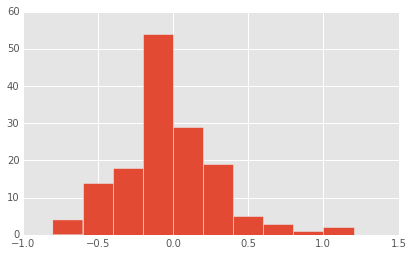

In [414]:
iris['Petal.Width'].diff().hist()

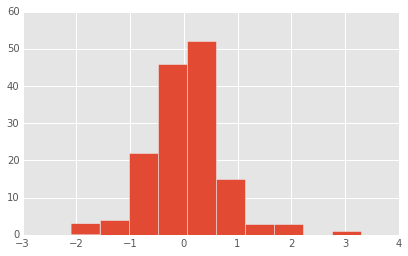

In [415]:
iris['Petal.Length'].diff().hist()

#### Notice below in this boxplot I added the ggplot style sheet

In [416]:
import matplotlib.pyplot as plt
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


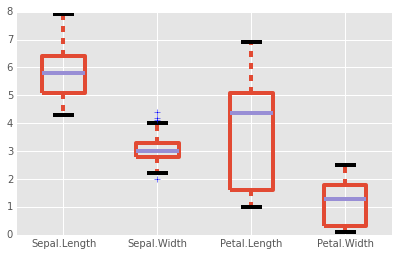

In [417]:
plt.style.use('ggplot')
irisbox = iris[[0,1,2,3]]
plt = irisbox.boxplot()

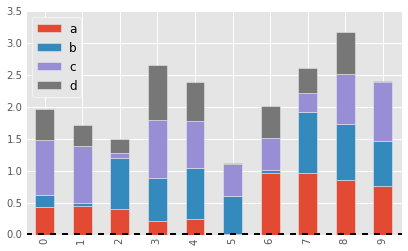

In [418]:
df2 = pd.DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar', stacked=True);

# Preparing Data for Sklearn Model

#### Goal is to transform our data into a matrix with features and targets. 

In [419]:
Matrix = iris.values

In [420]:
# Select our features (predictors)
MatrixFeatures = Matrix[:,[0,1,2,3]]
# Select our target
MatrixTarget = Matrix[:,[4]]

In [421]:
from sklearn.cross_validation import train_test_split

In [436]:
a_train, a_test, b_train, b_test = train_test_split(MatrixFeatures, MatrixTarget, test_size=0.75)
print "a_train" + str(a_train.shape)
print "a_test" + str( a_test.shape)
print ""
print "b_train" + str( b_train.shape)
print "b_test" + str(b_test.shape)

a_train(37L, 4L)
a_test(113L, 4L)

b_train(37L, 1L)
b_test(113L, 1L)


# KNN Sklearn model

#### This is just a very high-level overview of constructing an predictive model. For much more indepth knowledge please see http://scikit-learn.org/

In [437]:
clf = neighbors.KNeighborsClassifier(3, weights='distance')
clf.fit(a_train,ravel(b_train))
Z = clf.predict(a_test)

In [438]:
df = pd.DataFrame(Z) 
df =df.reset_index()
df1 = pd.DataFrame(b_test) 
df1 =df1.reset_index()


In [439]:
merged = df.merge(df1,on='index') 


In [440]:
merged.rename(columns={'0_x':'Pred'}, inplace=True)
merged.rename(columns={'0_y':'Actual'}, inplace=True)
pd.crosstab(merged.Pred, merged.Actual).apply(lambda r: r/r.sum(), axis=1)


Actual,setosa,versicolor,virginica
Pred,,,
setosa,1,0.000000,0.000000
versicolor,0,0.815789,0.184211
virginica,0,0.025641,0.974359


In [441]:
pd.crosstab(merged.Pred, merged.Actual)


Actual,setosa,versicolor,virginica
Pred,,,
setosa,36,0,0
versicolor,0,31,7
virginica,0,1,38


#### Often times I will use a stacked barchart to visualize the classifications

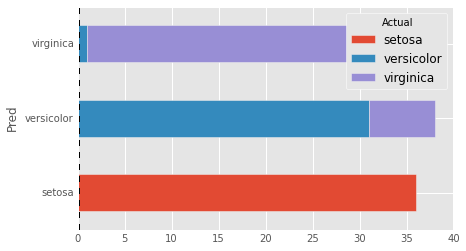

In [442]:
Data = pd.crosstab(merged.Pred, merged.Actual)
Data.plot(kind='barh', stacked=True);

### Thats All :)